In [149]:
import numpy as np
%run FrozenLake.ipynb
import math
# from scipy.special import softmax
env = FrozenLakeEnv()
def nStepSarsa(n):
    
    env.reset()
    alpha = 0.1
    gamma = 0.9
    epsilon = 1
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    returns = []
    p = [1/env.action_space.n for i in range(env.action_space.n)]
    #soft policy based Q
    def egreedy(state,epsilon):
#         print(Q[state])
#         print("state:",state)
        
        s = 0
        for i in range(env.action_space.n):
            s = s + math.exp(Q[state,i]/epsilon)
#         print(s)
        for i in range(env.action_space.n):
            p[i] = (math.exp(Q[state,i]/epsilon))/(s)
#         print(p)
        action = np.random.choice(env.action_space.n,1,p=p)
#         print("action:",action)
#         action = p.index(max(p))
#         print(p)
        return action[0]
#         print(Q)
#         if np.random.random() < epsilon:
#             return np.random.choice([a for a in range(env.action_space.n)])
#         else:
#             maxQ = max(Q[state,:])
#             for a in range(env.action_space.n):
#                 if Q[state,a] == maxQ:
#                     action = a 
#         return action



    for episode in range(100):
        Qlast = Q
#         print(episode)
        epsilon = 0.999 * epsilon
        state = env.reset()
        action = egreedy(state,epsilon)
        T = math.inf
        tau = 0
        t = 0
        e = 1e-20
        R = {}
        episodeStates = {}
        episodeActions = {}
        episodeStates[0] = state
        episodeActions[0] = action
        R[0] = 0
        while tau < T-1:
            
#             print("state:",state)
#             print("action:",action)
            if(t<T):
                nextState, reward, done, info = env.step(action)
                episodeStates[t+1] = nextState
#                 print(nextState)
                R[t+1] = reward
                if(done):
                    T = t+1
                else:
                    nextAction = egreedy(nextState,epsilon)
                    
                    episodeActions[t+1] = nextAction
            
            
            tau = t - n + 1
            
            if(tau >= 0):
                G = 0
                for i in range(tau+1,min(tau+n,T)):
                    G = G + np.power(gamma, i - tau - 1)*R[i]
                if(tau+n<T):
                    G = G + (gamma**n)*Q[episodeStates[tau+n],episodeActions[tau+n]]
                
                Q[episodeStates[tau],episodeActions[tau]] = Q[episodeStates[tau],episodeActions[tau]] + alpha*(G - Q[episodeStates[tau],episodeActions[tau]])
  
            t+= 1    
            state = nextState
            action = nextAction
#         print("hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii")     
   
        T = len(R)
        AVret = 0
        t = T - 2
        while t >= 0:
            AVret = R[t+1] + gamma * AVret
            t = t - 1

        returns.append(AVret)


    window = 20
    averagedReturns = np.zeros(len(returns)-window+1)

    for i in range(len(averagedReturns)):
        averagedReturns[i] = np.mean(returns[i:i+window])
    import matplotlib.pyplot as plt
    plt.plot(averagedReturns, linewidth=2)
    plt.xlabel("Episode")
    plt.ylabel("average return")
    plt.show()
    return Q

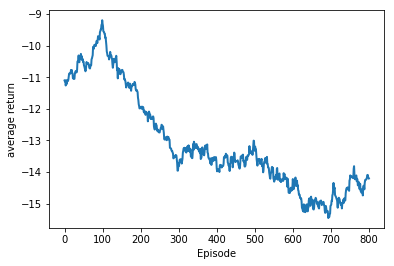

In [134]:
nStepSarsa(1)


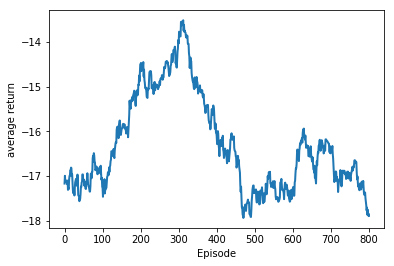

In [129]:
nStepSarsa(2)

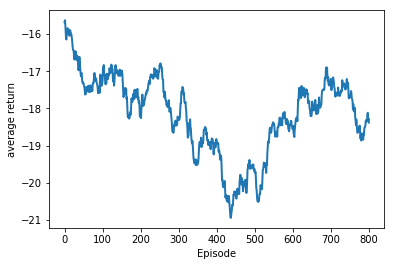

In [130]:
nStepSarsa(3)

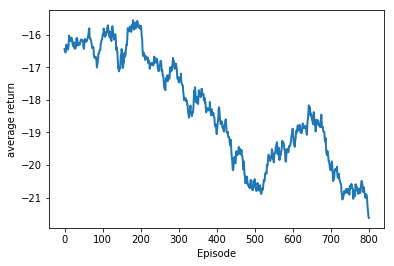

In [132]:
nStepSarsa(30)

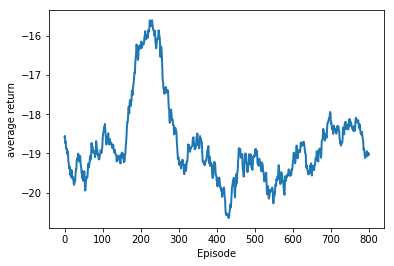

In [133]:
nStepSarsa(50)

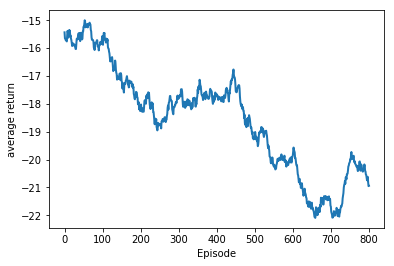

In [135]:
nStepSarsa(100)

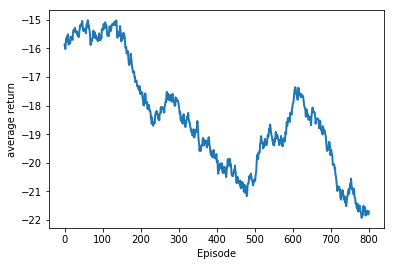

In [136]:
nStepSarsa(1000)

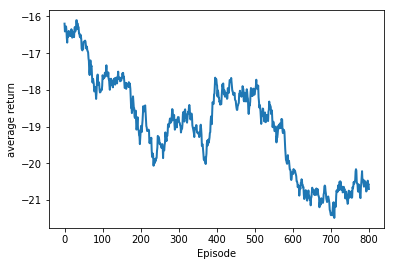

In [137]:
nStepSarsa(10000)

In [150]:
def regretnStepSarsa(n,opQ):
    env = FrozenLakeEnv()
    env.reset()
    alpha = 0.1
    gamma = 0.9
    epsilon = 1
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    returns = []
    p = [1/env.action_space.n for i in range(env.action_space.n)]
    #soft policy based Q
    def egreedy(state,epsilon):
#         print(Q[state])
#         print("state:",state)
        
        s = 0
        for i in range(env.action_space.n):
            s = s + math.exp(Q[state,i]/epsilon)
#         print(s)
        for i in range(env.action_space.n):
            p[i] = (math.exp(Q[state,i]/epsilon))/(s)
#         print(p)
        action = np.random.choice(env.action_space.n,1,p=p)
#         print("action:",action)
#         action = p.index(max(p))
#         print(p)
        return action[0]
#         print(Q)
#         if np.random.random() < epsilon:
#             return np.random.choice([a for a in range(env.action_space.n)])
#         else:
#             maxQ = max(Q[state,:])
#             for a in range(env.action_space.n):
#                 if Q[state,a] == maxQ:
#                     action = a 
#         return action


    regret = []
    for episode in range(100):
        Qlast = Q
#         print(episode)
        epsilon = 0.999 * epsilon
        state = env.reset()
        action = egreedy(state,epsilon)
        T = math.inf
        tau = 0
        t = 0
        e = 1e-20
        R = {}
        episodeStates = {}
        episodeActions = {}
        episodeStates[0] = state
        episodeActions[0] = action
        R[0] = 0
        reg = 0
        while tau < T-1:
            
#             print("state:",state)
#             print("action:",action)
            if(t<T):
                nextState, reward, done, info = env.step(action)
                opnextState, opreward, opdone, opinfo = env.step(opQ[state])
                reg = reg + (opreward - reward)
                
                episodeStates[t+1] = nextState
#                 print(nextState)
                R[t+1] = reward
                if(done):
                    T = t+1
                else:
                    nextAction = egreedy(nextState,epsilon)
                    
                    episodeActions[t+1] = nextAction
            
            
            tau = t - n + 1
            
            if(tau >= 0):
                G = 0
                for i in range(tau+1,min(tau+n,T)):
                    G = G + np.power(gamma, i - tau - 1)*R[i]
                if(tau+n<T):
                    G = G + (gamma**n)*Q[episodeStates[tau+n],episodeActions[tau+n]]
                
                Q[episodeStates[tau],episodeActions[tau]] = Q[episodeStates[tau],episodeActions[tau]] + alpha*(G - Q[episodeStates[tau],episodeActions[tau]])
  
            t+= 1    
            state = nextState
            action = nextAction
        regret.append(reg)
#         print("hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii")     
    return(regret)
   

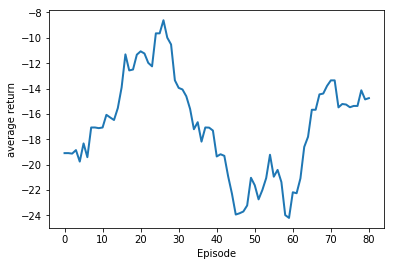

In [151]:
opQ = nStepSarsa(4)

In [152]:
opAction = []
for i in range(env.observation_space.n):
    x = np.where(opQ[i]==np.max(opQ[i]))
    opAction.append(x[0][0])
    
regret = regretnStepSarsa(4,opAction)

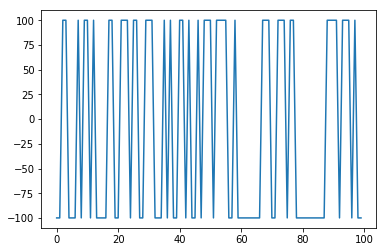

In [153]:
plt.plot(regret)